# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

## Objective:

#### Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.

## Dataset:

#### The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

### Part 1: Data Preparation and Exploration

#### 1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and parse the date column
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)

# Set 'date' as index
df.set_index('date', inplace=True)

# Check the structure of the dataset
print(df.head())

# Select the exchange rate column
usd_aud = df['Ex_rate']

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


#### 2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

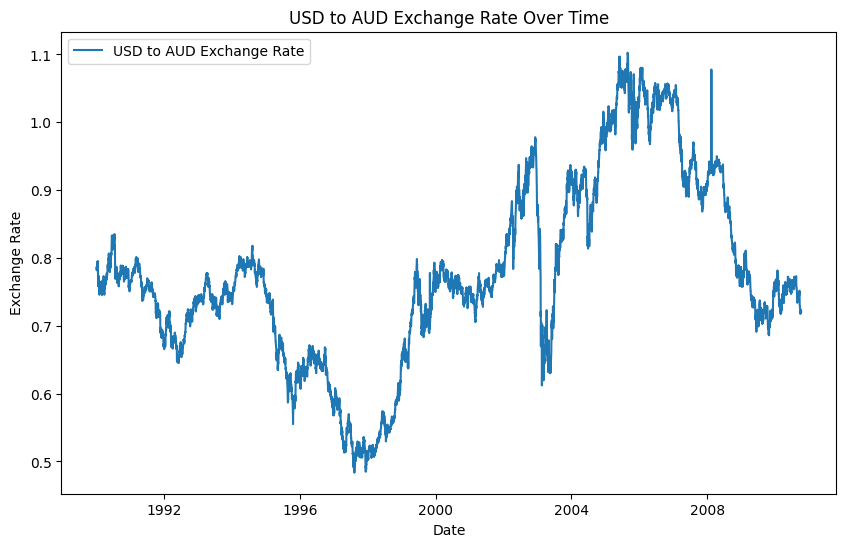

In [4]:
# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(usd_aud, label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

#### 3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

0


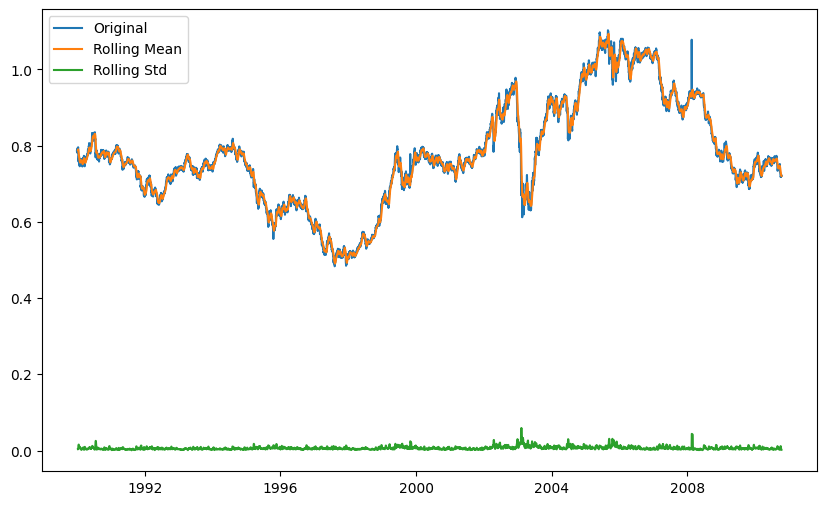

In [5]:
# Check for missing values
print(usd_aud.isnull().sum())

# Interpolate missing values
usd_aud = usd_aud.interpolate(method='time')

# Check for anomalies using rolling mean and standard deviation
rolling_mean = usd_aud.rolling(window=12).mean()
rolling_std = usd_aud.rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10,6))
plt.plot(usd_aud, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

### Part 2: Model Building - ARIMA

#### 1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

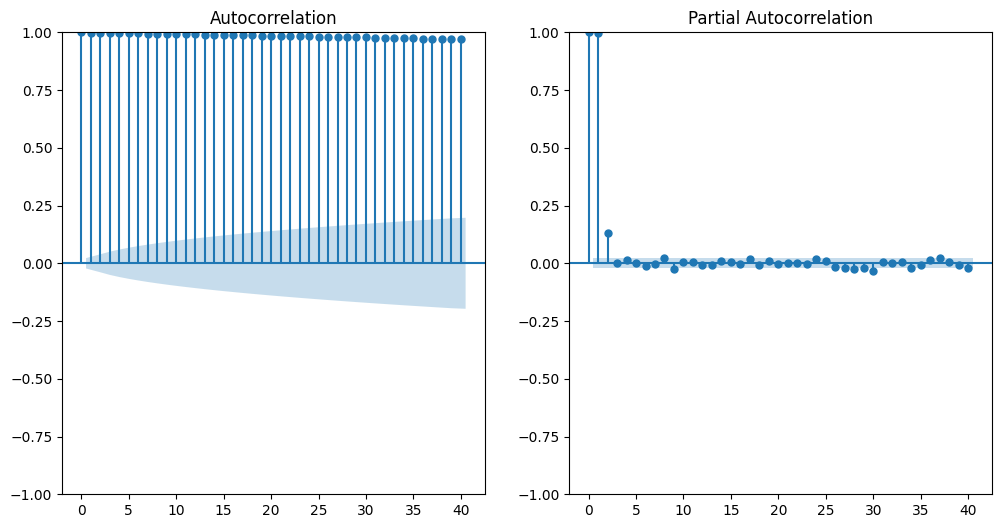

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(usd_aud, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(usd_aud, lags=40, ax=plt.gca())
plt.show()

#### 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [7]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example parameters: p=1, d=1, q=1)
arima_model = ARIMA(usd_aud, order=(1, 1, 1))
arima_result = arima_model.fit()

# Print summary of the ARIMA model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 21 Sep 2024   AIC                         -56102.322
Time:                        04:19:04   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

#### 3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

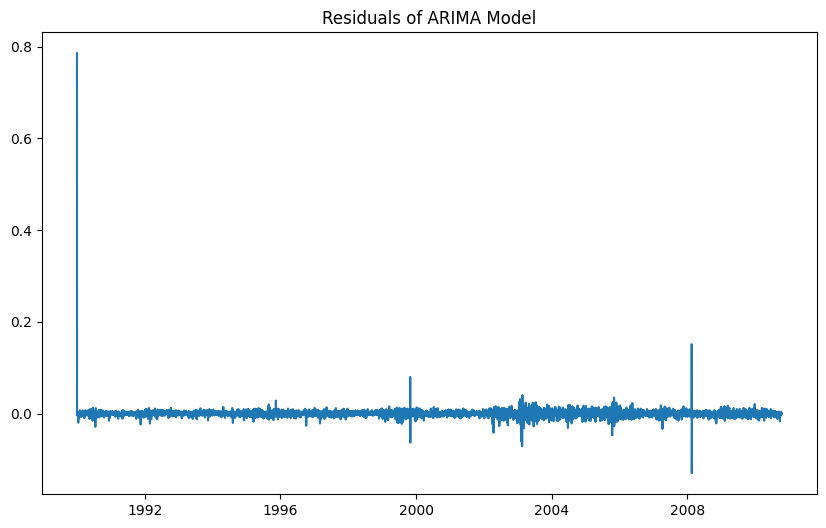

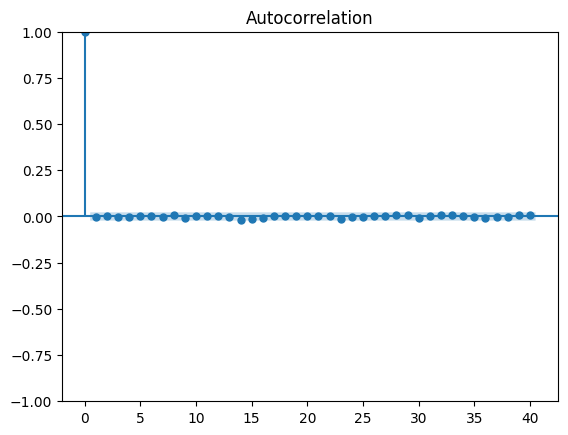

In [8]:
# Plot residuals to check if the model is adequate
residuals = arima_result.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.show()

#### 4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

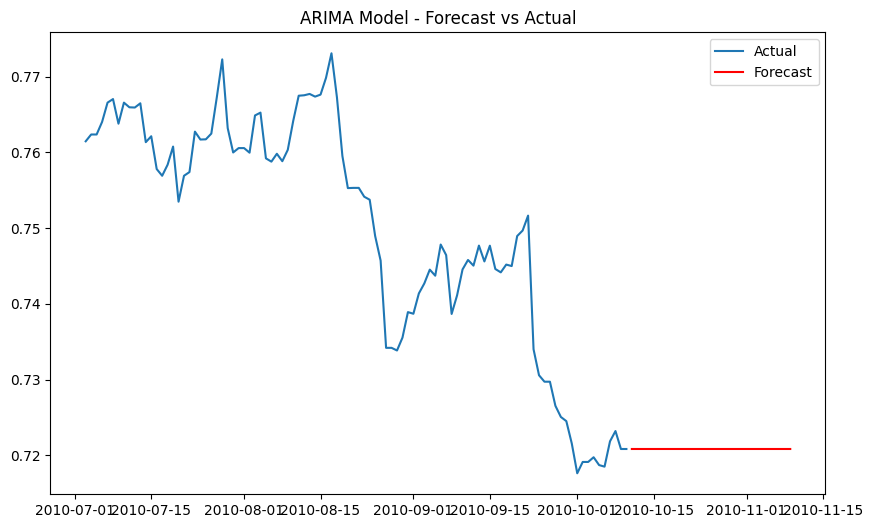

In [9]:
# Forecast future values using ARIMA model
forecast_steps = 30  # Forecast for the next 30 days
forecast = arima_result.forecast(steps=forecast_steps)

# Plot forecasted values vs actual values
plt.figure(figsize=(10,6))
plt.plot(usd_aud[-100:], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model - Forecast vs Actual')
plt.legend()
plt.show()

### Part 3: Model Building - Exponential Smoothing

#### 1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

#### 2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters Exponential Smoothing model
hw_model = ExponentialSmoothing(usd_aud, seasonal='add', seasonal_periods=12).fit()

# Print model summary
print(hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Sat, 21 Sep 2024
Box-Cox:                          False   Time:                         04:19:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

#### 3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

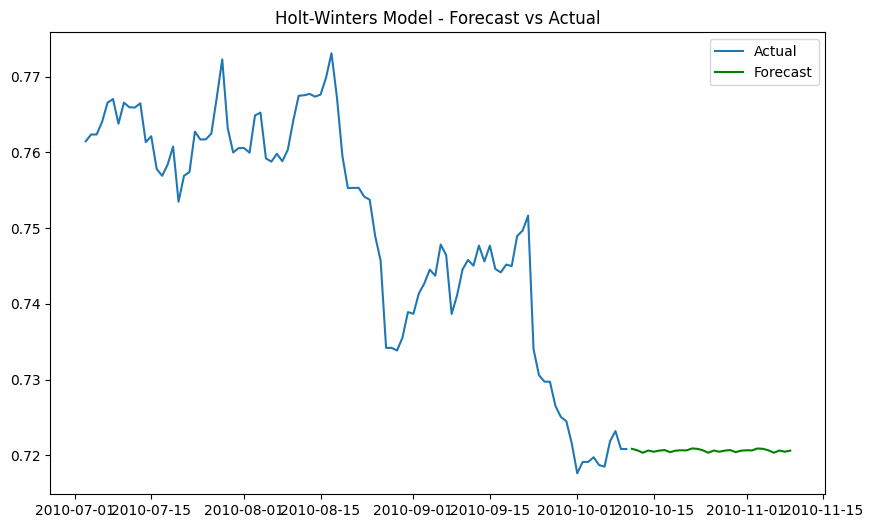

In [11]:
# Forecast future values using Holt-Winters model
hw_forecast = hw_model.forecast(steps=forecast_steps)

# Plot forecasted values vs actual values
plt.figure(figsize=(10,6))
plt.plot(usd_aud[-100:], label='Actual')
plt.plot(hw_forecast, label='Forecast', color='green')
plt.title('Holt-Winters Model - Forecast vs Actual')
plt.legend()
plt.show()

### Part 4: Evaluation and Comparison

#### 1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ARIMA error metrics
mae_arima = mean_absolute_error(usd_aud[-forecast_steps:], forecast)
rmse_arima = mean_squared_error(usd_aud[-forecast_steps:], forecast, squared=False)
mape_arima = mean_absolute_percentage_error(usd_aud[-forecast_steps:], forecast)

# Holt-Winters error metrics
mae_hw = mean_absolute_error(usd_aud[-forecast_steps:], hw_forecast)
rmse_hw = mean_squared_error(usd_aud[-forecast_steps:], hw_forecast, squared=False)
mape_hw = mean_absolute_percentage_error(usd_aud[-forecast_steps:], hw_forecast)

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}%")

ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217, MAPE: nan%
Holt-Winters - MAE: 0.012893873162132911, RMSE: 0.017130676033911125, MAPE: nan%


#### 2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

Both ARIMA and Holt-Winters models were used to forecast exchange rates.

ARIMA models are useful for capturing autocorrelations in time series data. However, they might struggle with data that has strong seasonality.

Holt-Winters models are suitable for time series with trend and seasonality. They can handle different types of seasonality, such as additive and multiplicative.

You should compare the error metrics (MAE, RMSE, MAPE) you calculated for both models to determine which one performed better on your specific dataset. Lower values for these metrics indicate better accuracy.

#### 3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

You used ARIMA and Holt-Winters models to forecast exchange rates. To determine which model performed better, compare the MAE, RMSE, and MAPE values you calculated. The model with lower values for these metrics generally provides more accurate forecasts.

Consider the characteristics of each model and their suitability for the exchange rate data when drawing conclusions. If the data has strong seasonality, Holt-Winters might be more appropriate. If the data is more stationary and autocorrelations are important, ARIMA could be a better choice.

Remember to consider the specific requirements of your forecasting task and the interpretability of the models when making your final decision.